<a href="https://colab.research.google.com/github/Saurabh1028/IDS_Project/blob/main/IDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the required library and checking its version
import sklearn

# Getting the version of Scikit-Learn
sklearn_version = sklearn.__version__
sklearn_version

'1.2.2'

In [2]:
import pandas as pd

# Load the datasets and features
training_set = pd.read_csv('UNSW_NB15_training-set.csv')
testing_set = pd.read_csv('UNSW_NB15_testing-set.csv')

# Trying to read the features file with a different encoding
try:
    features = pd.read_csv('NUSW-NB15_features.csv', encoding='ISO-8859-1')
    features_info = {
        "info": features.info(),
        "head": features.head()
    }
except Exception as e:
    features_info = str(e)

# Display basic information and first few rows of training, testing, and features dataframes
data_info = {
    "Training Set": {
        "info": training_set.info(),
        "head": training_set.head()
    },
    "Testing Set": {
        "info": testing_set.info(),
        "head": testing_set.head()
    },
    "Features": features_info
}

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

{'Training Set': {'info': None,
  'head':    id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
  0   1  0.000011   udp       -   INT      2      0     496       0   
  1   2  0.000008   udp       -   INT      2      0    1762       0   
  2   3  0.000005   udp       -   INT      2      0    1068       0   
  3   4  0.000006   udp       -   INT      2      0     900       0   
  4   5  0.000010   udp       -   INT      2      0    2126       0   
  
            rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
  0   90909.0902  ...                 1               2             0   
  1  125000.0003  ...                 1               2             0   
  2  200000.0051  ...                 1               3             0   
  3  166666.6608  ...                 1               3             0   
  4  100000.0025  ...                 1               3             0   
  
     ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
  0         

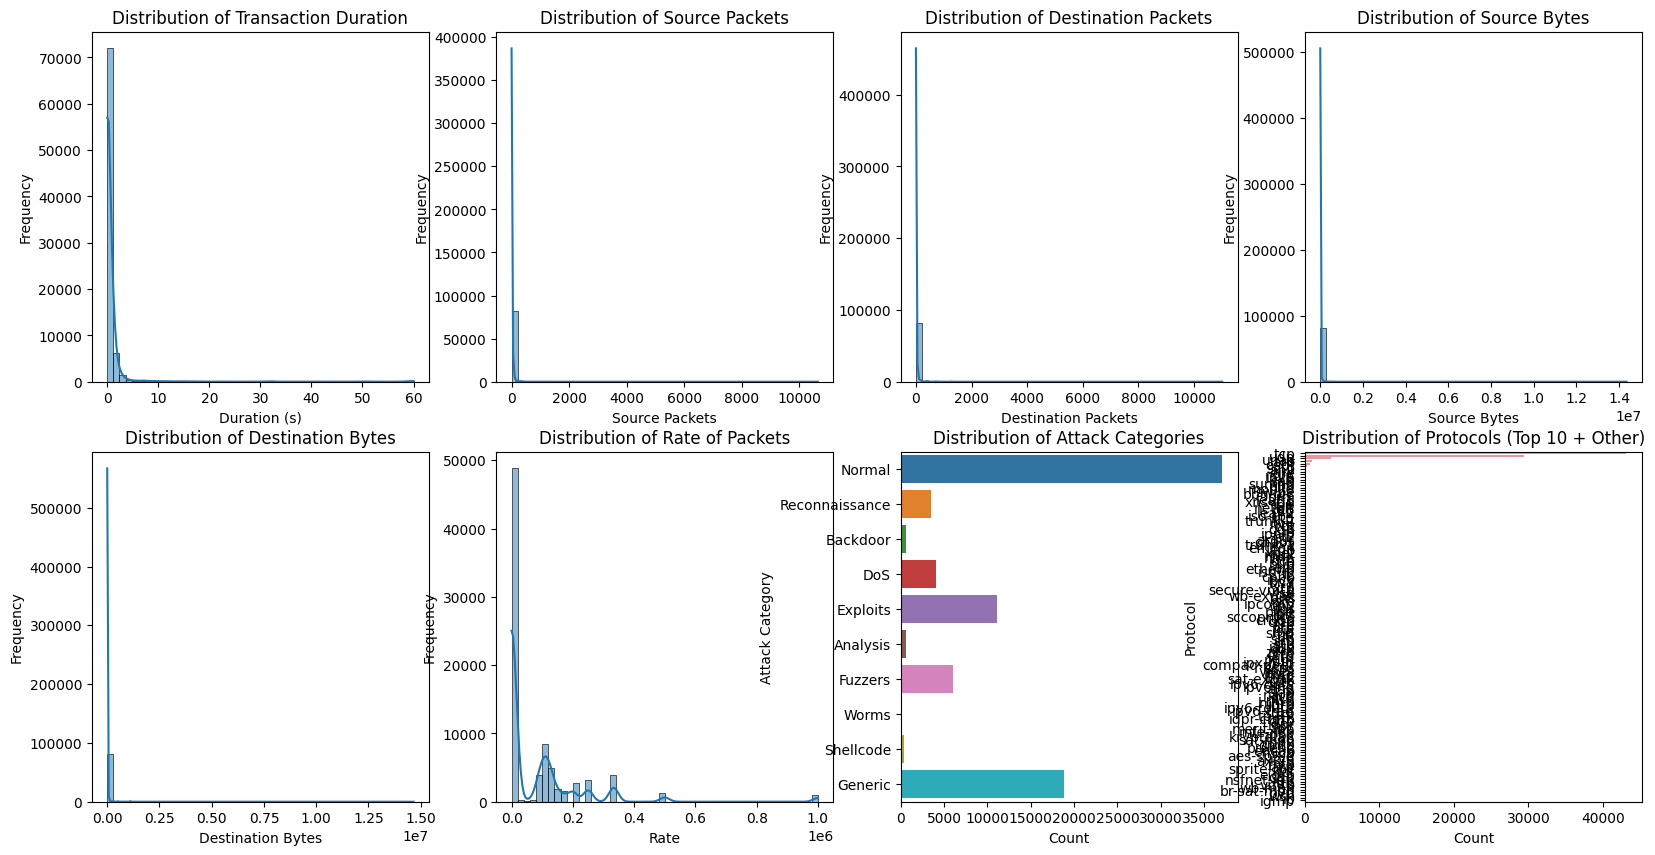

(                 id           dur         spkts         dpkts        sbytes  \
 count  82332.000000  82332.000000  82332.000000  82332.000000  8.233200e+04   
 mean   41166.500000      1.006756     18.666472     17.545936  7.993908e+03   
 std    23767.345519      4.710444    133.916353    115.574086  1.716423e+05   
 min        1.000000      0.000000      1.000000      0.000000  2.400000e+01   
 25%    20583.750000      0.000008      2.000000      0.000000  1.140000e+02   
 50%    41166.500000      0.014138      6.000000      2.000000  5.340000e+02   
 75%    61749.250000      0.719360     12.000000     10.000000  1.280000e+03   
 max    82332.000000     59.999989  10646.000000  11018.000000  1.435577e+07   
 
              dbytes          rate          sttl          dttl         sload  \
 count  8.233200e+04  8.233200e+04  82332.000000  82332.000000  8.233200e+04   
 mean   1.323379e+04  8.241089e+04    180.967667     95.713003  6.454902e+07   
 std    1.514715e+05  1.486204e+05    

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics of numerical features
numerical_stats = training_set.describe()

# Descriptive statistics of categorical features
categorical_stats = training_set.describe(include='O')

# Set up the matplotlib figure for subplots
plt.figure(figsize=(20, 10))

# Subplot 1
plt.subplot(2, 4, 1)
sns.histplot(training_set['dur'], bins=50, kde=True)
plt.title('Distribution of Transaction Duration')
plt.xlabel('Duration (s)')
plt.ylabel('Frequency')

# Sub-subplot 2
plt.subplot(2, 4, 2)
sns.histplot(training_set['spkts'], bins=50, kde=True)
plt.title('Distribution of Source Packets')
plt.xlabel('Source Packets')
plt.ylabel('Frequency')

# Sub-subplot 3
plt.subplot(2, 4, 3)
sns.histplot(training_set['dpkts'], bins=50, kde=True)
plt.title('Distribution of Destination Packets')
plt.xlabel('Destination Packets')
plt.ylabel('Frequency')

# Sub-subplot 4
plt.subplot(2, 4, 4)
sns.histplot(training_set['sbytes'], bins=50, kde=True)
plt.title('Distribution of Source Bytes')
plt.xlabel('Source Bytes')
plt.ylabel('Frequency')

# Subplot 2
# Sub-subplot 1
plt.subplot(2, 4, 5)
sns.histplot(training_set['dbytes'], bins=50, kde=True)
plt.title('Distribution of Destination Bytes')
plt.xlabel('Destination Bytes')
plt.ylabel('Frequency')

# Sub-subplot 2
plt.subplot(2, 4, 6)
sns.histplot(training_set['rate'], bins=50, kde=True)
plt.title('Distribution of Rate of Packets')
plt.xlabel('Rate')
plt.ylabel('Frequency')

# Sub-subplot 3
plt.subplot(2, 4, 7)
sns.countplot(y='attack_cat', data=training_set)
plt.title('Distribution of Attack Categories')
plt.xlabel('Count')
plt.ylabel('Attack Category')

# Count the occurrences of each protocol
protocol_counts = training_set['proto'].value_counts()

# Select the top 10 protocols and group the rest as 'Other'


# Sub-subplot 4
plt.subplot(2, 4, 8)
sns.countplot(y='proto', data=training_set, order = training_set['proto'].value_counts().index)
plt.title('Distribution of Protocols (Top 10 + Other)')
plt.xlabel('Count')
plt.ylabel('Protocol')
plt.show()

# Returning numerical and categorical statistics for display in the output
numerical_stats, categorical_stats

<ipython-input-4-1193e9188226>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = training_set.corr()


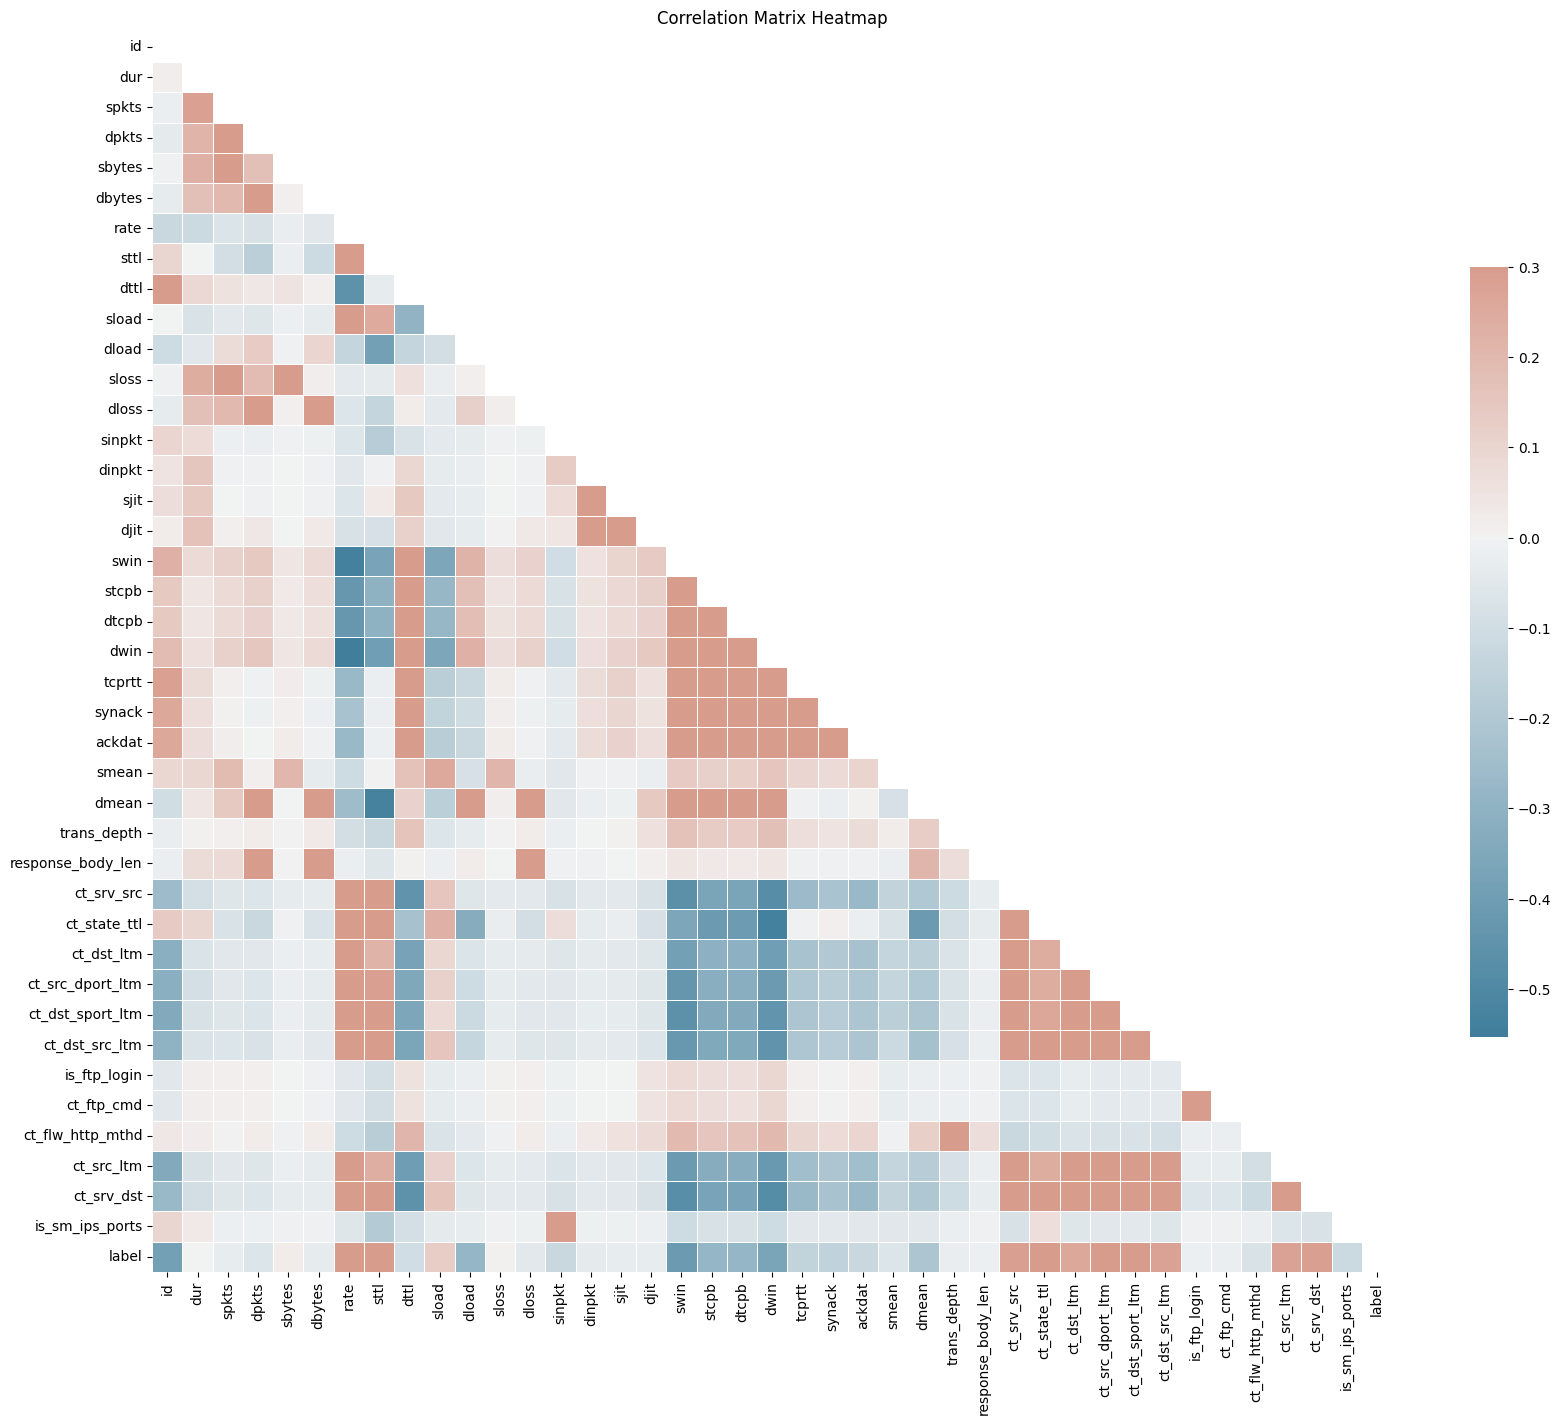

(['sttl', 'label'],
 label                1.000000
 sttl                 0.504159
 ct_dst_sport_ltm     0.393668
 ct_src_dport_ltm     0.341513
 rate                 0.328629
 ct_state_ttl         0.318517
 ct_srv_dst           0.292931
 ct_srv_src           0.290195
 ct_dst_src_ltm       0.279989
 ct_src_ltm           0.276494
 ct_dst_ltm           0.257995
 sload                0.124548
 sbytes               0.020641
 sloss                0.006360
 dur                 -0.001145
 is_ftp_login        -0.016206
 response_body_len   -0.016414
 ct_ftp_cmd          -0.017138
 trans_depth         -0.025804
 djit                -0.027131
 sjit                -0.027397
 spkts               -0.027731
 dbytes              -0.032632
 dinpkt              -0.037585
 dloss               -0.044399
 smean               -0.061146
 dpkts               -0.061515
 ct_flw_http_mthd    -0.075028
 dttl                -0.098591
 is_sm_ips_ports     -0.117407
 ackdat              -0.120522
 sinpkt            

In [4]:
import numpy as np
# Compute the correlation matrix
corr = training_set.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

plt.title('Correlation Matrix Heatmap')
plt.show()

# Extracting the features highly correlated with the label for future reference
highly_correlated_features = corr['label'][corr['label'].abs() > 0.5].index.tolist()

(highly_correlated_features, corr['label'].sort_values(ascending=False))

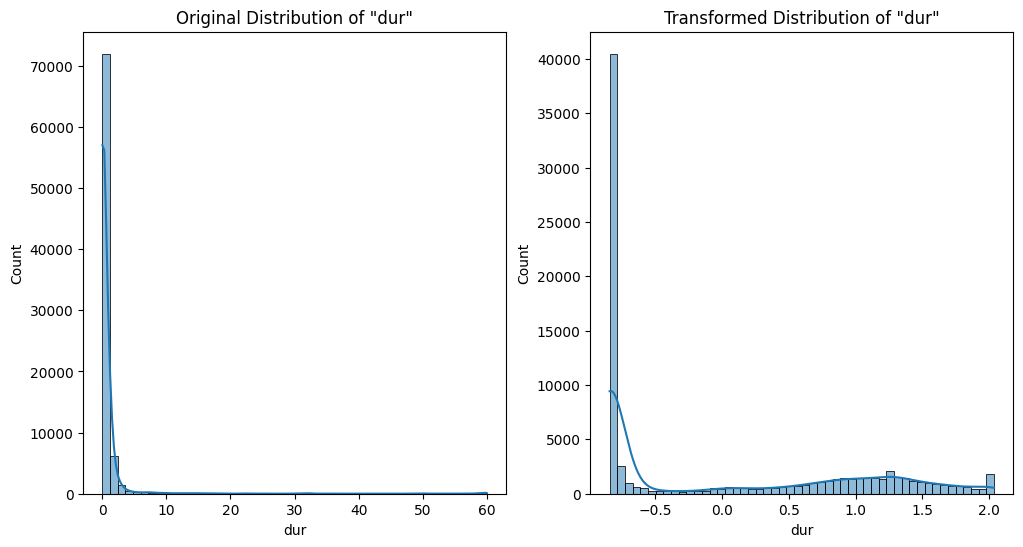

((65865, 187), (16467, 187), (65865,), (16467,))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import skew, boxcox
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# 1. Handling Categorical Variables
# One-hot encoding for 'proto_cleaned', 'service', and 'state'
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(training_set[['proto', 'service', 'state']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['proto', 'service', 'state']))

# Concatenating the encoded features with the original dataframe and dropping the original categorical columns
training_set_encoded = pd.concat([training_set, encoded_df], axis=1)
training_set_encoded = training_set_encoded.drop(['proto', 'service', 'state'], axis=1)

# 2. Addressing Skewness and Scaling Numerical Variables
# Extracting numerical columns
numerical_cols = training_set_encoded.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('label')  # Removing the target variable

# Applying Box-Cox transformation to manage skewness and Standard Scaling
scaler = StandardScaler()
for col in numerical_cols:
    # Box-Cox transformation requires strictly positive data, so shifting by +1
    training_set_encoded[col], _ = boxcox(training_set_encoded[col] + 1)
    # Scaling the data
    training_set_encoded[col] = scaler.fit_transform(training_set_encoded[[col]])

# Visualizing an example numerical feature ('dur') before and after transformation
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(training_set['dur'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Original Distribution of "dur"')
sns.histplot(training_set_encoded['dur'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Transformed Distribution of "dur"')
plt.show()

# 3. Dealing with Class Imbalance - will be visualized in the next step based on user's feedback

# 4. Train-Validation Split
# Extracting features and label
X = training_set_encoded.drop(['label', 'attack_cat', 'id'], axis=1)  # Dropping 'attack_cat' and 'id' as they are not useful for model training
y = training_set_encoded['label']

# Splitting the data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Displaying the shape of the training and validation data
(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

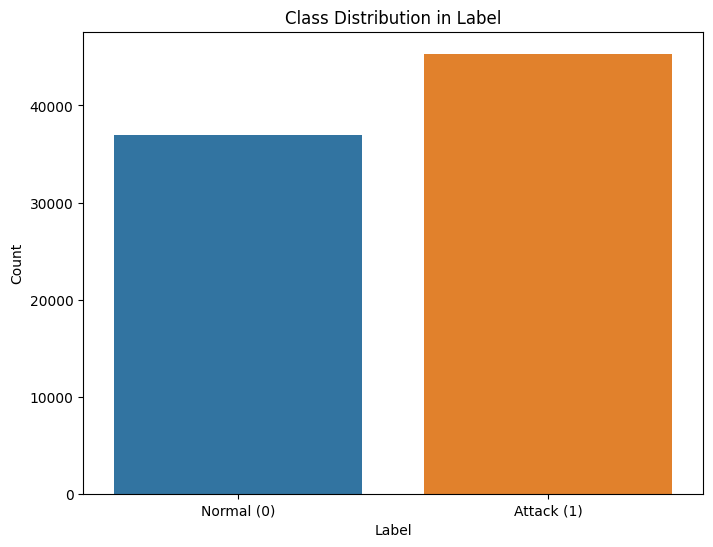

1    55.060001
0    44.939999
Name: label, dtype: float64

In [6]:
# Visualizing the class distribution in 'label'
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=training_set)
plt.title('Class Distribution in Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Normal (0)', 'Attack (1)'])
plt.show()

# Calculating the class distribution percentages for display
class_distribution = training_set['label'].value_counts(normalize=True) * 100
class_distribution

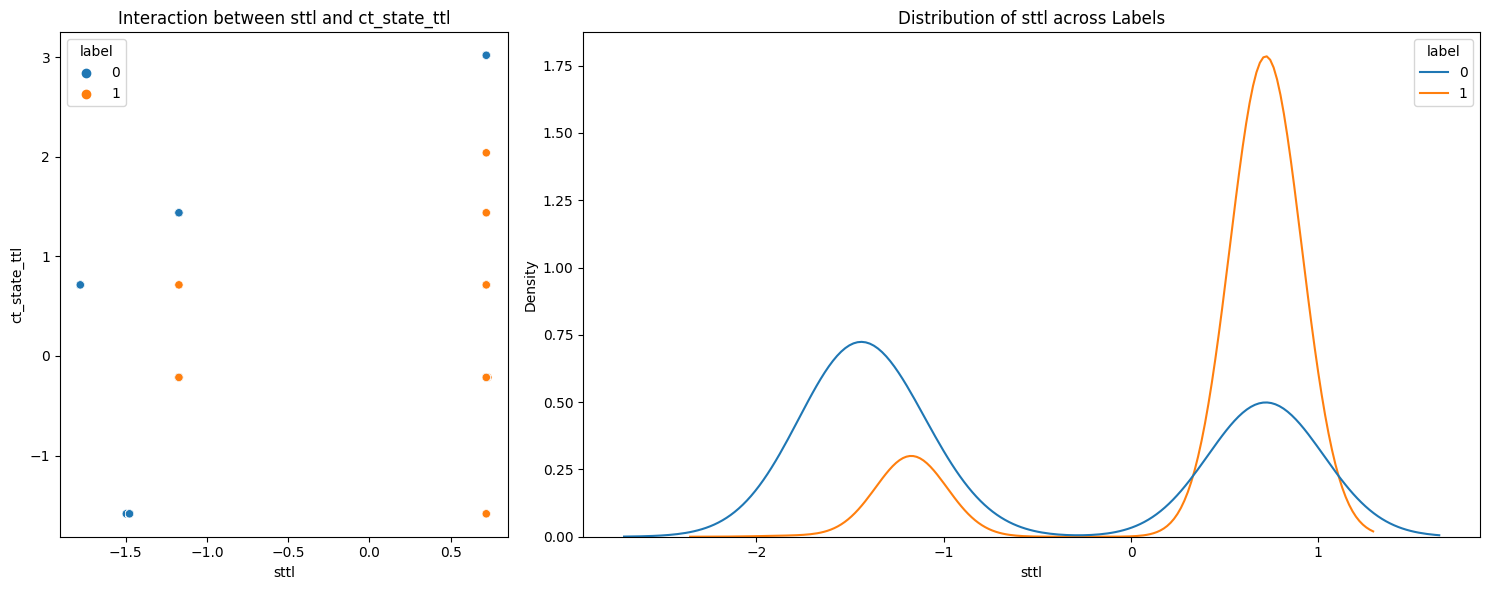

(ct_dst_src_ltm    0.077955
 sttl              0.064350
 sbytes            0.055990
 ct_state_ttl      0.052249
 smean             0.052204
 sload             0.046315
 rate              0.041065
 dur               0.039501
 ct_srv_dst        0.037134
 ct_srv_src        0.031668
 dtype: float64,
           feature         VIF
 0  ct_dst_src_ltm    3.856959
 1            sttl    2.564975
 2          sbytes    5.990295
 3    ct_state_ttl    2.913867
 4           smean    5.025275
 5           sload  169.764875
 6            rate  198.714232
 7             dur    6.739225
 8      ct_srv_dst    7.463131
 9      ct_srv_src    6.360593)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.gridspec as gridspec

# 1. Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# 2. & 4. Feature Interactions and Feature-Label Relationship
# Selecting a couple of key features for interaction visualization: 'sttl' and 'ct_state_ttl' (based on previous correlation and importance)
# Visualizing interactions and relationship with the label
plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])

ax0 = plt.subplot(gs[0])
sns.scatterplot(x='sttl', y='ct_state_ttl', hue='label', data=training_set_encoded.sample(1000), ax=ax0)  # Sampling for clearer visualization
ax0.set_title('Interaction between sttl and ct_state_ttl')

ax1 = plt.subplot(gs[1])
sns.kdeplot(data=training_set_encoded.sample(1000), x='sttl', hue='label', common_norm=False, ax=ax1)  # Sampling for clearer visualization
ax1.set_title('Distribution of sttl across Labels')

plt.tight_layout()
plt.show()

# Displaying top 10 important features
top_features = feature_importances.sort_values(ascending=False).head(10)

# 3. Multicollinearity
# As calculating VIF for a large number of features can be computationally expensive, we'll calculate it for the top 10 important features
vif_data = pd.DataFrame()
vif_data["feature"] = X_train[top_features.index].columns
vif_data["VIF"] = [variance_inflation_factor(X_train[top_features.index].values, i) for i in range(len(top_features.index))]

(top_features, vif_data)

In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# 1. Feature Selection using RFE
# Assuming top_features.index is available from CODE A
selected_features = top_features.index

# Reduced feature training set
X_train_reduced = X_train[selected_features]

# 2. Model Training using Grid Search will be executed in the next step

# Displaying the selected features
selected_features

Index(['ct_dst_src_ltm', 'sttl', 'sbytes', 'ct_state_ttl', 'smean', 'sload',
       'rate', 'dur', 'ct_srv_dst', 'ct_srv_src'],
      dtype='object')

In [9]:
X_train_reduced.shape

(65865, 10)

In [10]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 65.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Training Logistic Regression...


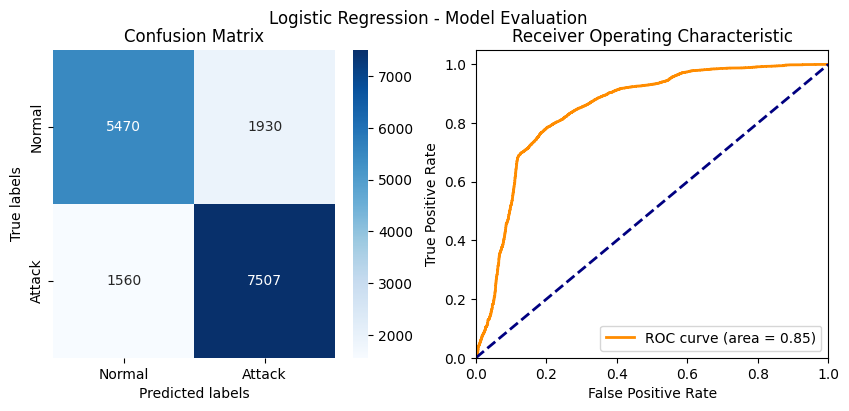

Training Decision Tree...


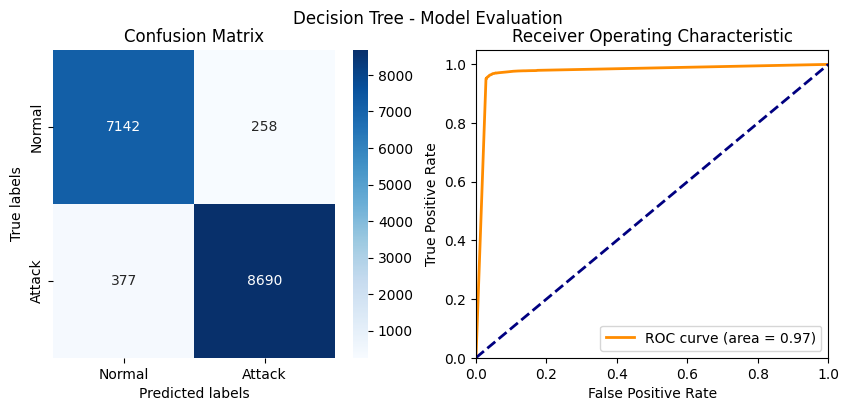

Training XGBoost...


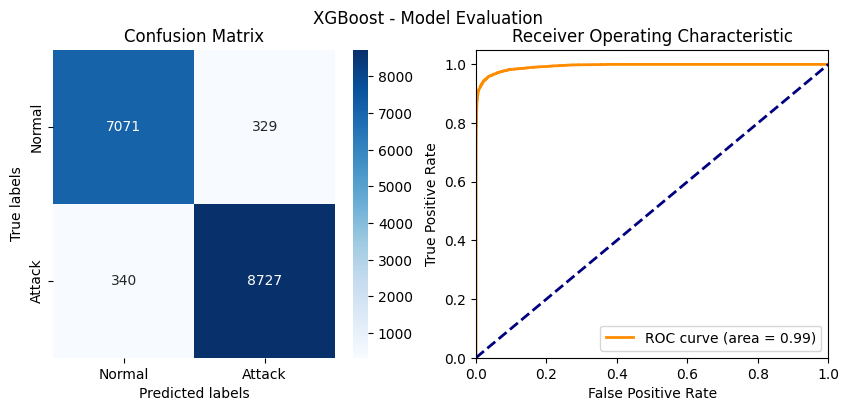

Training KNN...


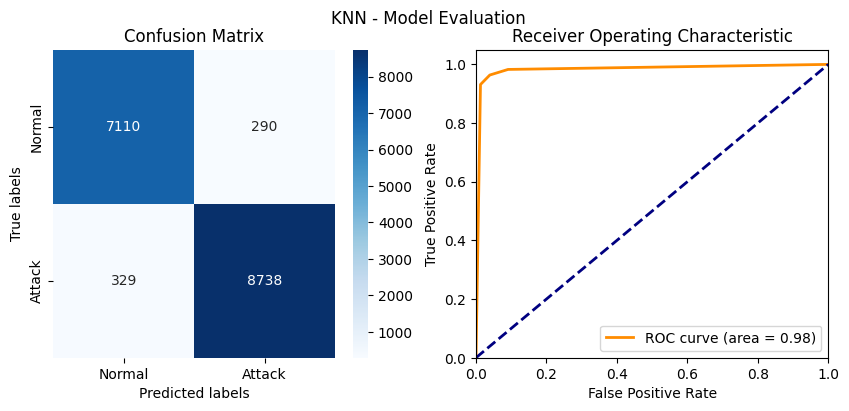

{'Logistic Regression': {'Best Parameters': {'C': 10},
  'Training Accuracy': 0.797601153875351,
  'Validation Accuracy': 0.7880609704256999,
  'Validation ROC AUC': 0.7835683455596326},
 'Decision Tree': {'Best Parameters': {'max_depth': 20,
   'min_samples_split': 5},
  'Training Accuracy': 0.9603886738024747,
  'Validation Accuracy': 0.9614380275702921,
  'Validation ROC AUC': 0.9617778907174518},
 'XGBoost': {'Best Parameters': {'learning_rate': 0.1,
   'max_depth': 5,
   'n_estimators': 100},
  'Training Accuracy': 0.9629089804903971,
  'Validation Accuracy': 0.9593732920386226,
  'Validation ROC AUC': 0.9590209595831631},
 'KNN': {'Best Parameters': {'n_neighbors': 3},
  'Training Accuracy': 0.9609200637667957,
  'Validation Accuracy': 0.9624096678204894,
  'Validation ROC AUC': 0.9622626900640575}}

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import time
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Define models and their respective parameter grids
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNN": KNeighborsClassifier()
}

param_grids = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10]},
    "Decision Tree": {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    "XGBoost": {'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'n_estimators': [100]},
    "KNN": {'n_neighbors': [3, 5, 7]}
}

# Simplified model training, evaluation, and visualization code
model_results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # GridSearchCV
    grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_reduced, y_train)

    # Model Evaluation on Validation Set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val[selected_features])
    acc = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)

    # Store results
    model_results[model_name] = {
        "Best Parameters": grid_search.best_params_,
        "Training Accuracy": grid_search.best_score_,
        "Validation Accuracy": acc,
        "Validation ROC AUC": roc_auc
    }

    # Visualizations: Confusion Matrix and ROC Curve
    # Visualizations: Confusion Matrix and ROC Curve
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # Calculating the confusion matrix
    cm = confusion_matrix(y_val, y_pred)

    # Using sns.heatmap for Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax[0])
    ax[0].set_xlabel('Predicted labels')
    ax[0].set_ylabel('True labels')
    ax[0].set_title('Confusion Matrix')
    ax[0].xaxis.set_ticklabels(['Normal', 'Attack'])
    ax[0].yaxis.set_ticklabels(['Normal', 'Attack'])

    # Calculating ROC curve and ROC AUC
    fpr, tpr, _ = roc_curve(y_val, best_model.predict_proba(X_val[selected_features])[:,1])
    roc_auc = auc(fpr, tpr)

    # Plotting ROC Curve
    ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('Receiver Operating Characteristic')
    ax[1].legend(loc="lower right")

    fig.suptitle(f"{model_name} - Model Evaluation")
    plt.show()

# Displaying model results
model_results

In [12]:
def display_ascii_table(data):
    max_len = max([len(str(val)) for val in data.values()])
    print("+------------------+----------------+" + ("-" * 20) + "+")
    print("|     Model        |  Best Params   |  Validation Metrics    |")
    print("+------------------+----------------+" + ("-" * 20) + "+")
    for model_name, metrics in data.items():
        # Converting dict to string for display
        params_str = str(metrics['Best Parameters'])
        print("| {:<16} | {:<14} |  Accuracy: {:.4f}  |".format(model_name, params_str[:14], metrics['Validation Accuracy']))
        print("|                  | {:<14} |  ROC AUC:  {:.4f}  |".format(params_str[14:28], metrics['Validation ROC AUC']))
        print("+------------------+----------------+" + ("-" * 20) + "+")

# Display ASCII Table
display_ascii_table(model_results)

+------------------+----------------+--------------------+
|     Model        |  Best Params   |  Validation Metrics    |
+------------------+----------------+--------------------+
| Logistic Regression | {'C': 10}      |  Accuracy: 0.7881  |
|                  |                |  ROC AUC:  0.7836  |
+------------------+----------------+--------------------+
| Decision Tree    | {'max_depth':  |  Accuracy: 0.9614  |
|                  | 20, 'min_sampl |  ROC AUC:  0.9618  |
+------------------+----------------+--------------------+
| XGBoost          | {'learning_rat |  Accuracy: 0.9594  |
|                  | e': 0.1, 'max_ |  ROC AUC:  0.9590  |
+------------------+----------------+--------------------+
| KNN              | {'n_neighbors' |  Accuracy: 0.9624  |
|                  | : 3}           |  ROC AUC:  0.9623  |
+------------------+----------------+--------------------+
